In [ ]:
#Level 1:Basic Data Exploration & Visualization using Python

In [ ]:
# Task 1: Job Market Overview

In [ ]:
#Task 01

#Identify the top 10 most in-demand job roles based on the number of postings.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('india job Market.csv')

# Get unique job roles
unique_job_roles = df['Job Title'].unique()

# Print the unique job roles
print(unique_job_roles)

# Optional: Sort the job roles
unique_job_roles_sorted = sorted(unique_job_roles)
print(unique_job_roles_sorted)


['Software Engineer' 'Marketing Executive' 'Financial Analyst'
 'Business Analyst' 'Data Scientist' 'Sales Representative'
 'Product Manager' 'HR Manager' 'Cyber Security Analyst'
 'Graphic Designer']
['Business Analyst', 'Cyber Security Analyst', 'Data Scientist', 'Financial Analyst', 'Graphic Designer', 'HR Manager', 'Marketing Executive', 'Product Manager', 'Sales Representative', 'Software Engineer']


In [ ]:
job_role_counts = df['Job Title'].value_counts()  # replace 'job_role_column' with the actual column name

# Display the counts
print(job_role_counts)

Job Title
Cyber Security Analyst    2085
Marketing Executive       2036
Graphic Designer          2013
Financial Analyst         2008
Product Manager           2006
Business Analyst          1989
Data Scientist            1976
HR Manager                1974
Software Engineer         1971
Sales Representative      1942
Name: count, dtype: int64


In [ ]:
# Task 02 Find the top 5 companies with the most job postings.

In [4]:
company_counts = df['Job Title'].value_counts()  # replace 'company_column' with the actual column name for companies

# Get the top 5 companies with the most job postings
top_5_companies = company_counts.head(5)

# Display the top 5 companies
print(top_5_companies)

Job Title
Cyber Security Analyst    2085
Marketing Executive       2036
Graphic Designer          2013
Financial Analyst         2008
Product Manager           2006
Name: count, dtype: int64


In [ ]:
# Create a bar chart showing the distribution of job types

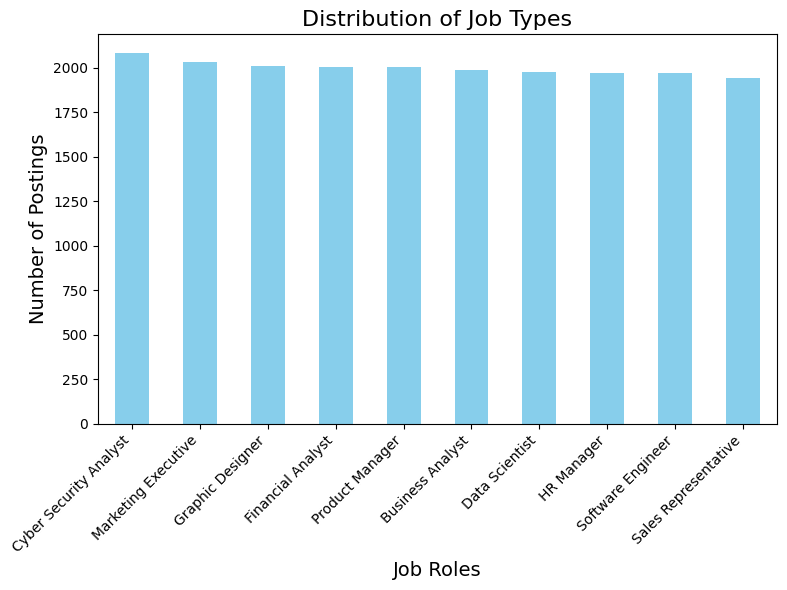

In [5]:

import matplotlib.pyplot as plt


# Count the number of occurrences of each job role
job_role_counts = df['Job Title'].value_counts()  # replace 'job_role_column' with the actual column name

# Plot the bar chart
plt.figure(figsize=(8, 6))  # Set the size of the figure
job_role_counts.plot(kind='bar', color='skyblue')  # Bar chart with color

# Add labels and title
plt.title('Distribution of Job Types', fontsize=16)
plt.xlabel('Job Roles', fontsize=14)
plt.ylabel('Number of Postings', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Task 2 :Salary & Experience Analysis

In [ ]:
# Task 01 Analyze the salary range distribution using a histogram.

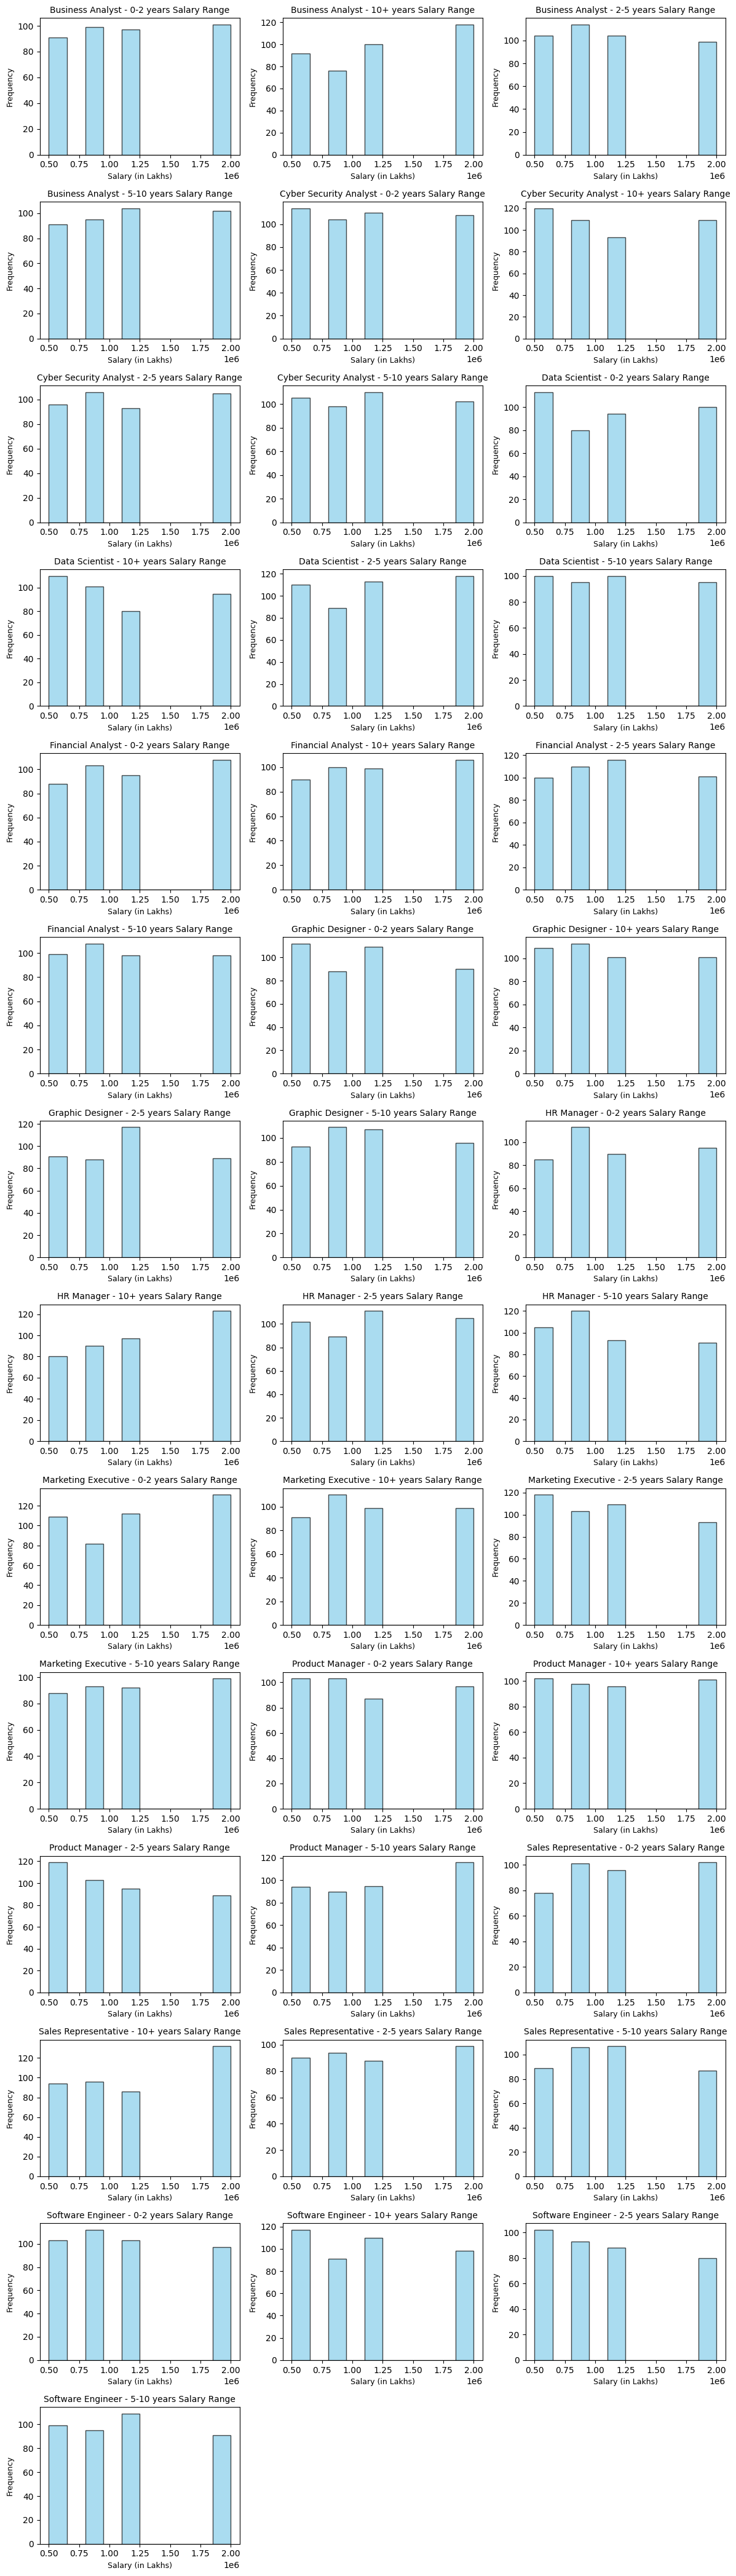

In [6]:

import re
import math

# Select relevant columns and rename for consistency
df_selected = df[['Job Title', 'Experience Required', 'Salary Range']].copy()
df_selected.columns = ['job_title', 'experience', 'salary_range']

# Function to convert salary range (e.g., "5-8 LPA" or "20+ LPA") to numerical values
def extract_salary_range(salary_range):
    match = re.match(r'(\d+)(?:-(\d+))?\s*LPA', salary_range, re.IGNORECASE)
    if match:
        lower = int(match.group(1)) * 100000  # Convert LPA to actual salary
        upper = int(match.group(2)) * 100000 if match.group(2) else lower  # Handle "20+ LPA" cases
        return lower, upper
    return None, None

# Apply function to extract salary values
df_selected['lower_salary'], df_selected['upper_salary'] = zip(*df_selected['salary_range'].dropna().apply(extract_salary_range))

# Group by job title and experience
grouped = df_selected.groupby(['job_title', 'experience'])

# Determine the number of unique groups
num_groups = len(grouped)
rows = math.ceil(num_groups / 3)  # Adjust rows dynamically

plt.figure(figsize=(12, rows * 3))

for idx, (name, group) in enumerate(grouped):
    plt.subplot(rows, 3, idx + 1)
    group['upper_salary'].dropna().plot(kind='hist', bins=10, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f"{name[0]} - {name[1]} Salary Range", fontsize=10)
    plt.xlabel('Salary (in Lakhs)', fontsize=9)
    plt.ylabel('Frequency', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
# Task-02 Find the average experience required for each job type.

job_type
Contract      3.987172
Full-time     3.987332
Internship    4.014833
Part-time     3.977261
Name: avg_experience, dtype: float64


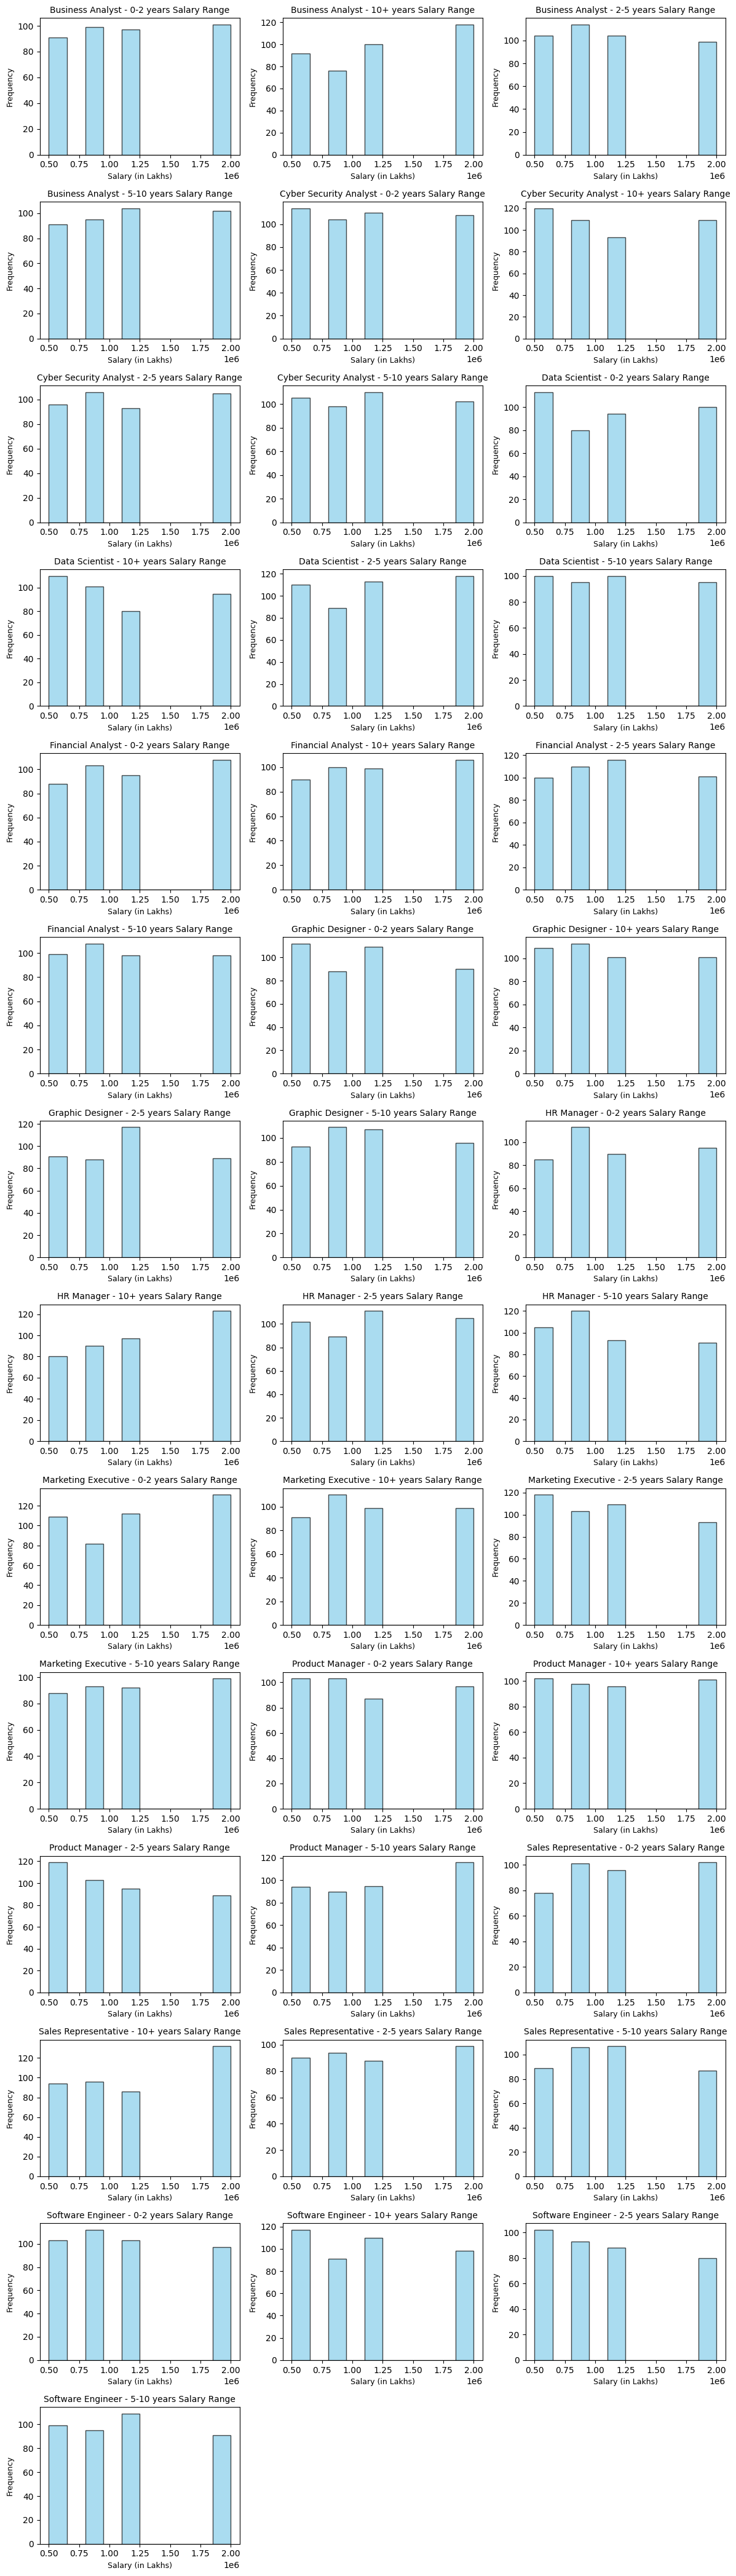

In [7]:

import re
import math
# Select relevant columns and rename for consistency
df_selected = df[['Job Title', 'Experience Required', 'Salary Range', 'Job Type']].copy()
df_selected.columns = ['job_title', 'experience', 'salary_range', 'job_type']

# Function to convert salary range (e.g., "5-8 LPA" or "20+ LPA") to numerical values
def extract_salary_range(salary_range):
    match = re.match(r'(\d+)(?:-(\d+))?\s*LPA', salary_range, re.IGNORECASE)
    if match:
        lower = int(match.group(1)) * 100000  # Convert LPA to actual salary
        upper = int(match.group(2)) * 100000 if match.group(2) else lower  # Handle "20+ LPA" cases
        return lower, upper
    return None, None

# Apply function to extract salary values
df_selected['lower_salary'], df_selected['upper_salary'] = zip(*df_selected['salary_range'].dropna().apply(extract_salary_range))

# Function to extract numerical experience values and compute the average
def extract_experience(exp_required):
    match = re.match(r'(\d+)(?:-(\d+))?\s*years', str(exp_required), re.IGNORECASE)
    if match:
        lower = int(match.group(1))
        upper = int(match.group(2)) if match.group(2) else lower  # Handle "10+ years" cases
        return (lower + upper) / 2  # Average experience
    return None

# Apply the function to extract experience values
df_selected['avg_experience'] = df_selected['experience'].apply(extract_experience)

# Compute the average experience required for each job type
avg_experience_per_job_type = df_selected.groupby('job_type')['avg_experience'].mean()
print(avg_experience_per_job_type)

# Group by job title and experience
grouped = df_selected.groupby(['job_title', 'experience'])

# Determine the number of unique groups
num_groups = len(grouped)
rows = math.ceil(num_groups / 3)  # Adjust rows dynamically

plt.figure(figsize=(12, rows * 3))

for idx, (name, group) in enumerate(grouped):
    plt.subplot(rows, 3, idx + 1)
    group['upper_salary'].dropna().plot(kind='hist', bins=10, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f"{name[0]} - {name[1]} Salary Range", fontsize=10)
    plt.xlabel('Salary (in Lakhs)', fontsize=9)
    plt.ylabel('Frequency', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
# Task 03 Identify which salary range job postings and visualize it.

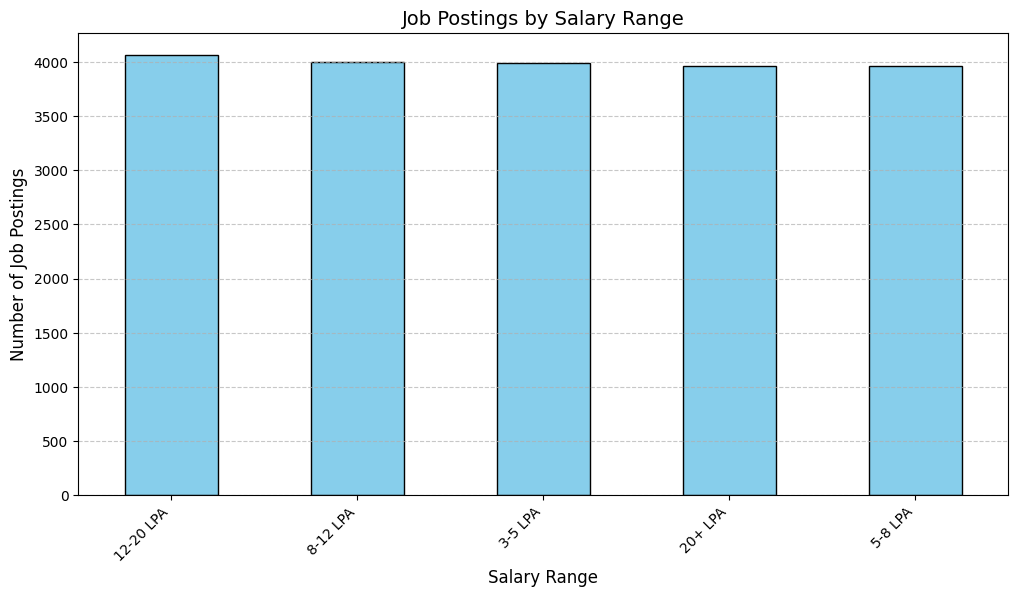

'12-20 LPA'

In [8]:
import matplotlib.pyplot as plt

# Count the number of job postings for each salary range
salary_counts = df["Salary Range"].value_counts()

# Plot the data
plt.figure(figsize=(12, 6))
salary_counts.plot(kind="bar", color="skyblue", edgecolor="black")

# Customize the plot
plt.xlabel("Salary Range", fontsize=12)
plt.ylabel("Number of Job Postings", fontsize=12)
plt.title("Job Postings by Salary Range", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

# Find the salary range with the highest number of job postings
most_common_salary_range = salary_counts.idxmax()
most_common_salary_range


In [ ]:
# Task 3: Location-Based Insights

In [ ]:
#Task 01 Find the top 5 cities with the highest number of job postings

In [9]:
# Count the number of job postings for each city
top_cities = df["Job Location"].value_counts().head(5)

# Display the top 5 cities with the highest number of job postings
top_cities


Job Location
Hyderabad    2055
Bangalore    2023
Ahmedabad    2019
Jaipur       2019
Chennai      2018
Name: count, dtype: int64

In [ ]:
# Task 02 Create a pie chart to visualize the most common job types in different locations.

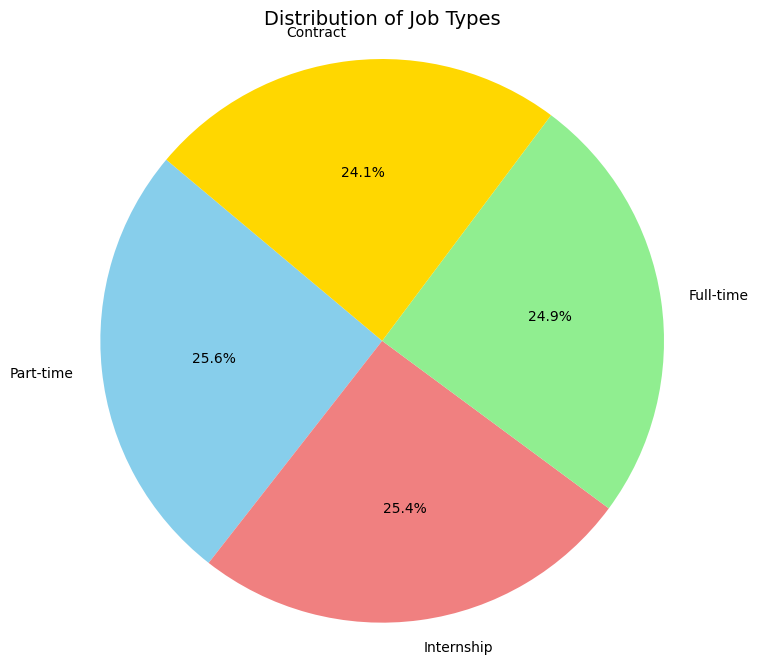

In [10]:
# Count the number of job postings by job type
job_type_counts = df["Job Type"].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(job_type_counts, labels=job_type_counts.index, autopct="%1.1f%%", colors=["skyblue", "lightcoral", "lightgreen", "gold"], startangle=140)
plt.title("Distribution of Job Types", fontsize=14)
plt.axis("equal")  # Ensures the pie chart is circular

# Show the plot
plt.show()


In [ ]:
# Task 03 Identify the top 3 cities with the most remote job opportunities.



In [11]:
# Filter dataset for remote job opportunities
remote_jobs = df[df["Remote/Onsite"].str.lower() == "remote"]

# Count the number of remote job postings by city
top_remote_cities = remote_jobs["Job Location"].value_counts().head(3)

# Display the top 3 cities with the most remote job opportunities
top_remote_cities


Job Location
Kolkata      708
Chennai      688
Hyderabad    682
Name: count, dtype: int64

In [ ]:
# Task 4 :Skills & Education Insights


In [ ]:
# Task 01 Find the top 10 most required skills in job postings.

In [12]:
# Split the "Skills Required" column into individual skills and count occurrences
skills_series = df["Skills Required"].dropna().str.split(",").explode().str.strip()

# Count the most frequently mentioned skills
top_skills = skills_series.value_counts().head(10)

# Display the top 10 most required skills in job postings
top_skills


Skills Required
UI/UX                6138
Python               6134
Java                 6103
React                6073
C++                  5993
SQL                  5953
Excel                5951
Digital Marketing    5907
AWS                  5891
Machine Learning     5857
Name: count, dtype: int64

In [ ]:
# Task 02 Analyze the correlation between education level and salary range using a scatter plot.

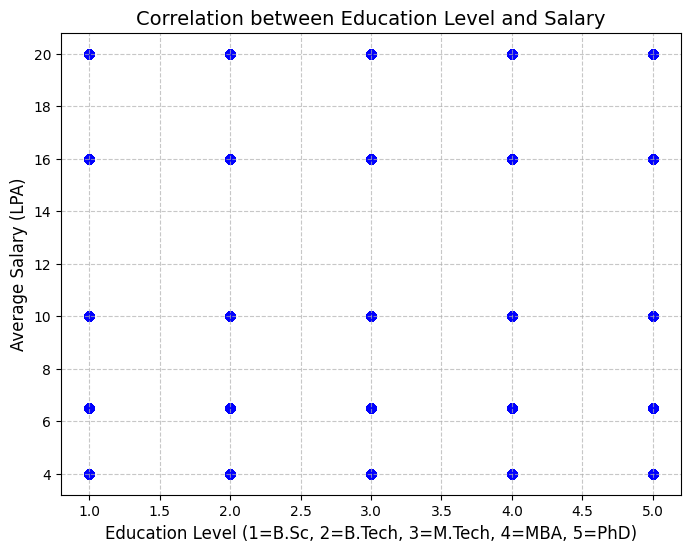

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import re

# Function to extract the average salary from salary range (e.g., "12-20 LPA" -> 16 LPA)
def extract_salary(salary):
    if isinstance(salary, str):
        salary = re.sub(r"[^\d\-]", "", salary)  # Remove non-numeric characters except '-'
        if "-" in salary:  # Format: "12-20"
            low, high = map(int, salary.split("-"))
            return (low + high) / 2  # Average salary
        elif salary.isdigit():  # Single number case
            return int(salary)
    return np.nan

# Apply the salary extraction function
df["Average Salary (LPA)"] = df["Salary Range"].apply(extract_salary)

# Map education levels to numerical categories
education_mapping = {"B.Sc": 1, "B.Tech": 2, "M.Tech": 3, "MBA": 4, "PhD": 5}
df["Education Level (Numeric)"] = df["Education Requirement"].map(education_mapping)

# Scatter plot of education level vs. salary range
plt.figure(figsize=(8, 6))
plt.scatter(df["Education Level (Numeric)"], df["Average Salary (LPA)"], alpha=0.5, color="blue")

# Customize the plot
plt.xlabel("Education Level (1=B.Sc, 2=B.Tech, 3=M.Tech, 4=MBA, 5=PhD)", fontsize=12)
plt.ylabel("Average Salary (LPA)", fontsize=12)
plt.title("Correlation between Education Level and Salary", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)

# Show the plot
plt.show()


In [ ]:
 # Task 03 Identify which education level is most demanded for each job role.

In [14]:
# Count the most demanded education level for each job role
most_demanded_education = df.groupby("Job Title")["Education Requirement"].agg(lambda x: x.value_counts().idxmax())

# Display the most demanded education level for each job role
most_demanded_education


Job Title
Business Analyst             MBA
Cyber Security Analyst       PhD
Data Scientist               MBA
Financial Analyst         B.Tech
Graphic Designer             MBA
HR Manager                B.Tech
Marketing Executive          MBA
Product Manager             B.Sc
Sales Representative      B.Tech
Software Engineer           B.Sc
Name: Education Requirement, dtype: object